# Рабочая тетрадь 

### Определение статуса сообщения (спам/обычное)

In [17]:
# Импорт библиотек
import warnings
warnings.filterwarnings('ignore') # будем игнорировать предупреждения
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.corpus import stopwords as sw
import re
import string
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /home/user/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [56]:
data = pd.read_csv('train_spam.csv')
pd.set_option('display.max_colwidth', 120)

In [3]:
data.head()

,text_type,text
0,ham,make sure alex knows his birthday is over in fifteen minutes as far as youre concerned
1,ham,a resume for john lavorato thanks vince i will get moving on it right away molly vince j kaminski 02 21 2001 05 55 p...
2,spam,plzz visit my website moviesgodml to get all movies for free and also i provide direct download links no redirect an...
3,spam,urgent your mobile number has been awarded with a £2000 prize guaranteed call 09061790121 from land line claim 3030 ...
4,ham,overview of hr associates analyst project per david s request attached is an overview of the hr associates analysts ...


In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16278 entries, 0 to 16277
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   text_type    16278 non-null  object
 1   text         16278 non-null  object
 2   count_punct  16278 non-null  object
 3   len_text     16278 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 508.8+ KB


In [50]:
data.isna().sum() # выведем количество пропущенных

text_type      0
text           0
count_punct    0
len_text       0
dtype: int64

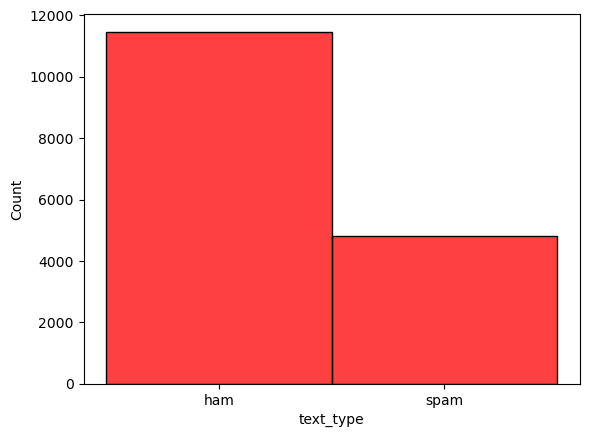

In [6]:
sns.histplot(data=data, x=data['text_type'], color='red');

In [57]:
data['count_punct'] = data['text'].apply(lambda x: np.sum([1 for i in x if i in string.punctuation]))

pattern = '[0-9!#$%&()*+,./:;<=>?@[\]^_`{|}~—/"/\-№]+'

def processing(text):
    '''
    Обработаем текст сообщений
    '''
    text = text.lower()
    
    text = re.sub(pattern, ' ', text)
    
    ps = nltk.PorterStemmer()
    text = ps.stem(text)

    wl = nltk.WordNetLemmatizer()
    text = wl.lemmatize(text)
    
    return text

data['text'] = data['text'].apply(processing)
data['len_text'] = data['text'].apply(lambda x: len(x) - x.count(' '))

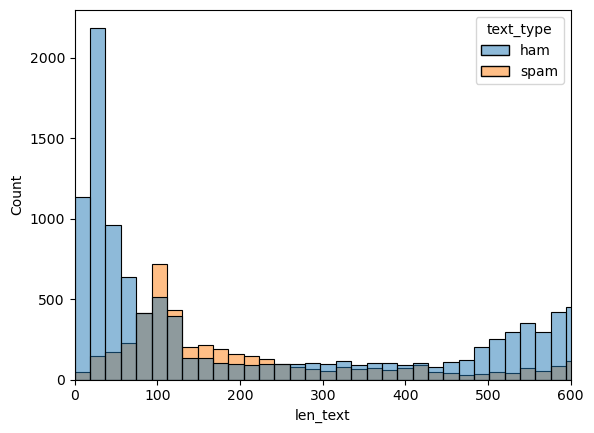

In [58]:
sns.histplot(data=data, x='len_text', hue='text_type', bins=40);
plt.xlim(0, 600);

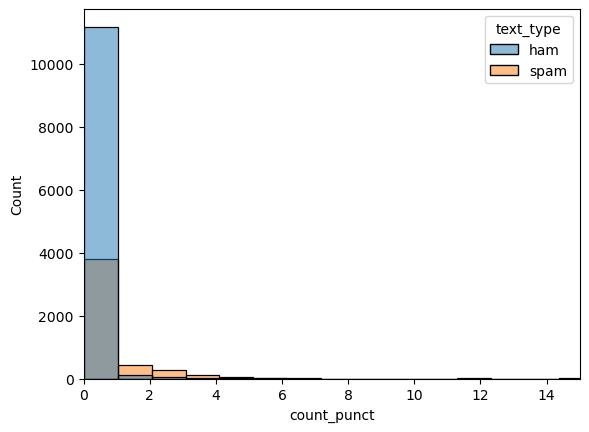

In [59]:
sns.histplot(data=data, x='count_punct', hue='text_type', bins=37);
plt.xlim(0, 15);

In [53]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data['count_punct'] = scaler.fit(pd.DataFrame(data['count_punct']))
data['len_text'] = scaler.fit_transform(pd.DataFrame(data['len_text']))

In [35]:
X_train, X_test, y_train, y_test = train_test_split(data['text'], 
                                                    data['text_type'], 
                                                    random_state=1, 
                                                    stratify=data['text_type'], 
                                                    test_size=0.3)

In [36]:
stop_words = sw.words('english')
tv_model = TfidfVectorizer(stop_words=stop_words, binary=True)

In [37]:
X_train_tv = tv_model.fit(X_train)
X_train_tv = tv_model.transform(X_train)
X_test_tv = tv_model.transform(X_test)

In [63]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train_tv,y_train);

from sklearn.linear_model import LogisticRegression
log = LogisticRegression(max_iter=1000)
log.fit(X_train_tv,y_train);

from sklearn.svm import LinearSVC
svc = LinearSVC()
svc.fit(X_train_tv,y_train);

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train_tv, y_train);

In [64]:
from sklearn.metrics import classification_report, confusion_matrix
def report(model):
    preds = model.predict(X_test_tv)
    print(classification_report(y_test,preds))
    confusion_matrix(y_pred=preds,y_true=y_test)

print('SVC')
report(svc)

print('LOG')
report(log)

print('NB')
report(nb)

print('RFC')
report(rfc)

SVC
              precision    recall  f1-score   support

         ham       0.95      0.97      0.96      3441
        spam       0.92      0.88      0.90      1443

    accuracy                           0.94      4884
   macro avg       0.93      0.92      0.93      4884
weighted avg       0.94      0.94      0.94      4884

LOG
              precision    recall  f1-score   support

         ham       0.91      0.97      0.94      3441
        spam       0.93      0.78      0.85      1443

    accuracy                           0.92      4884
   macro avg       0.92      0.88      0.90      4884
weighted avg       0.92      0.92      0.92      4884

NB
              precision    recall  f1-score   support

         ham       0.85      0.98      0.91      3441
        spam       0.93      0.59      0.72      1443

    accuracy                           0.86      4884
   macro avg       0.89      0.78      0.81      4884
weighted avg       0.87      0.86      0.85      4884

RFC
    